In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import minmax_scale

In [3]:
import sys
sys.path.insert(1, "/home/lukasg/code/braindecode/")

In [ ]:
from braindecode.visualization.plot import ax_scalp

In [5]:
import matplotlib
matplotlib.rcParams.update({"font.size": 20})

In [6]:
CHANNEL_10_20_APPROX = (
    "angle",
    ["A1", [-5, 0]],
    ["A2", [5, 0]],
        
    ["Fp1", [-3.500, 3.500]],
    ["Fp2", [3.500, 3.500]],

    ["F7", [-4.000, 2.000]],
    ["F3", [-2.000, 2.000]],
    ["Fz", [0.000, 2.000]],
    ["F4", [2.000, 2.000]],
    ["F8", [4.000, 2.000]],

    ["C3", [-2.000, 0.000]],
    ["Cz", [0.000, 0.000]],
    ["C4", [2.000, 0.000]],

    ["P3", [-2.000, -2.000]],
    ["Pz", [0.000, -2.000]],
    ["P4", [2.000, -2.000]],
    
    ["O1", [-3.5, -3.5]],
    ["O2", [3.5, -3.5]],
    
    ["T3", [-3.5, 0]],
    ["T6", [3.5, -2]],
    ["T4", [3.5, 0]],
    ["T5", [-3.5, -2]],
)

In [7]:
names = ['A1', 'A2', 'C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2',
       'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']

In [8]:
df = pd.read_csv("../results/features/rf/pathological/without_age_and_gender/eval/feature_importances_eval.csv", index_col=0)

In [9]:
feature_labels = df.columns

In [10]:
# average over domains / electrodes / freq bands and plot a bar chart
domains = [feature_label.split("_")[0]
           for feature_label in feature_labels]
domains = np.unique(domains)

electrodes = [feature_label.split("_")[-1]
              for feature_label in feature_labels
              if len(feature_label.split("_")) > 2]
electrodes = np.unique(electrodes)
electrodes = [electrode for electrode in electrodes
              if "-" not in electrode]

freq_bands = [feature_label.split("_")[-2]
              for feature_label in feature_labels
              if len(feature_label.split("_")) == 4]
freq_bands = [freq_band for freq_band in freq_bands if "-" in freq_band]
freq_bands, indices = np.unique(freq_bands, return_index=True)
indices, freq_bands = zip(*sorted(zip(indices, freq_bands)))

In [11]:
def plot_scaled_mean_importances(list_of_properties_and_name, mean_feature_importances, feature_labels, out_dir=None):
    plt.figure(figsize=(7*len(list_of_properties_and_name), 5))
    for j, (properties, property_name) in enumerate(list_of_properties_and_name):
        mean_property_importances = []
        for property_ in properties:
            importances = [feature_importance for i, feature_importance in enumerate(mean_feature_importances)
                           if property_ in feature_labels[i]]
            mean_property_importances.append(np.mean(importances))

        return np.array(mean_property_importances)
        scaled_mean_importance = mean_property_importances/np.sum(mean_property_importances)
        plt.subplot(1, len(list_of_properties_and_name), j+1)
        plt.bar(range(len(properties)), scaled_mean_importance)
        plt.xticks(range(len(properties)), properties, rotation=90)
        plt.ylabel("importance")
        plt.xlabel(property_name)

    if out_dir is not None:
        plt.savefig(out_dir, "importances.png", dpi=400)

In [12]:
domain_imp = plot_scaled_mean_importances([(domains, "domain")], df.mean(), df.columns, out_dir=None)
domain_imp = minmax_scale(domain_imp)

<Figure size 504x360 with 0 Axes>

In [13]:
band_imp = plot_scaled_mean_importances([(freq_bands, "freq bands")], df.mean(), df.columns, out_dir=None)
band_imp = minmax_scale(band_imp)

<Figure size 504x360 with 0 Axes>

In [14]:
freq_bands

('0.0-2.0Hz',
 '1.0-3.0Hz',
 '2.0-4.0Hz',
 '3.0-6.0Hz',
 '4.0-8.0Hz',
 '6.0-10.0Hz',
 '8.0-13.0Hz',
 '10.0-15.0Hz',
 '13.0-18.0Hz',
 '15.0-21.0Hz',
 '18.0-24.0Hz',
 '21.0-27.0Hz',
 '24.0-30.0Hz',
 '27.0-39.0Hz',
 '30.0-49.9Hz')

In [15]:
range_ = "0_4"

In [16]:
if range_ == "0_4":
    bands_to_pick = [
     '0.0-2.0Hz',
     '1.0-3.0Hz',
     '2.0-4.0Hz',
    ]
    title = "0-4 Hz"
elif range_ == "4_8":
    bands_to_pick = [
    '4.0-8.0Hz'
]
    title = "4-8 Hz"
elif range_ == "8_13":
    bands_to_pick = [
    '8.0-13.0Hz'
    ]
    title = "8-13 Hz"
else:
    print("unsupported")

In [17]:
ids = [i for i in range(len(df.columns)) for band in bands_to_pick if band in df.columns[i] ]

In [18]:
len(ids)

1197

In [19]:
elec_imp = plot_scaled_mean_importances([(electrodes, "electrode")], 
                                        df.mean()[ids], df.columns, out_dir=None)
elec_imp = minmax_scale(elec_imp)

<Figure size 504x360 with 0 Axes>

In [20]:
fs = 20

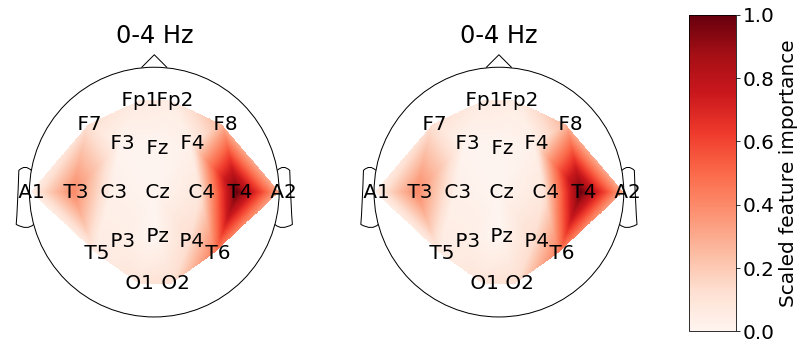

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13,8))
for i_class in range(2):
    ax = axes[i_class]
    im = ax_scalp(elec_imp, names, chan_pos_list=CHANNEL_10_20_APPROX, cmap="Reds",
             vmin=elec_imp.min(), vmax=elec_imp.max(), ax=ax, annotate=True, fontsize=fs)
    #ax.set_title(class_names[i_class])
    ax.set_title(title, fontsize=fs+4)    
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.05, 0.55])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel("Scaled feature importance", fontsize=fs)
cbar.ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=fs);

why is freq range 4-8 Hz only very important at T4 and not at T3?  
assume it is because of feature correlation. check this!

In [23]:
ids = [i for i in range(len(df.columns)) for band in bands_to_pick if band in df.columns[i]]

In [24]:
corrs = np.zeros(shape=(len(names), len(names)))
for j, e1 in enumerate(names):
    for k, e2 in enumerate(names):
        ids_e1 = [i for i in ids if e1.upper() in df.columns[i]]
        ids_e2 = [i for i in ids if e2.upper() in df.columns[i]]        
        assert len(ids_e1) == len(ids_e2)
        corrs[j,k] = np.corrcoef(df.mean()[ids_e1], df.mean()[ids_e2])[0, 1]

In [25]:
corrs[names.index("T4")][names.index("T3")]

0.8689895617812848

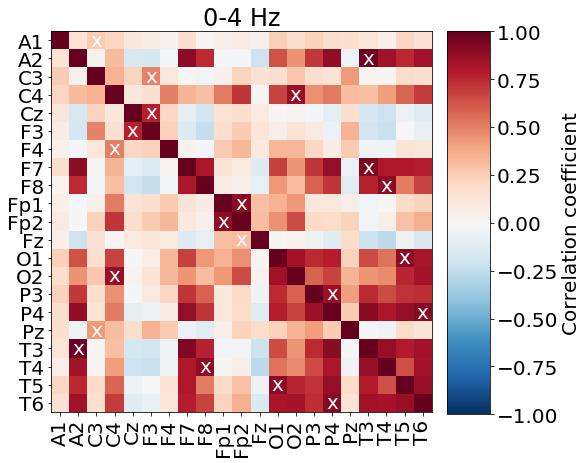

In [26]:
fig,ax = plt.subplots(figsize=(12,7))
im = plt.imshow(corrs, vmin=-1, vmax=1, cmap="RdBu_r")
plt.xticks(range(len(names)), names, rotation=90, fontsize=fs);
plt.yticks(range(len(names)), names, fontsize=fs);
plt.title(title, fontsize=fs+4)

fig.subplots_adjust(right=1.1)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.76])
cbar = fig.colorbar(im, cax=cbar_ax, )
cbar.ax.set_ylabel("Correlation coefficient", fontsize=fs);

for j in range(len(names)):
    max_i = np.argsort(-np.abs(corrs[j]))[1]
    ax.text(max_i, j, "x", va="center", ha="center", color="w", fontsize=fs)

In [27]:
corrs[names.index("T4")][names.index("T3")]

0.8689895617812848

/home/lukasg/.conda/envs/brainfeatures/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/lukasg/.conda/envs/brainfeatures/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


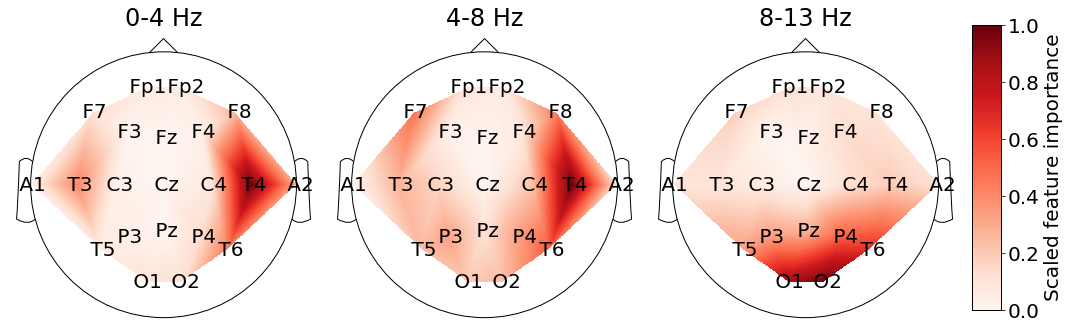

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [28]:
fs = 20
ranges = ["0_4", "4_8", "8_13"]
fig, axes = plt.subplots(1, len(ranges), figsize=(19.5,12))
plt.subplots_adjust(wspace=.05)
for k, range_ in enumerate(ranges):
    if range_ == "0_4":
        bands_to_pick = [
         '0.0-2.0Hz',
         '1.0-3.0Hz',
         '2.0-4.0Hz',
        ]
        title = "0-4 Hz"
    elif range_ == "4_8":
        bands_to_pick = [
        '4.0-8.0Hz'
    ]
        title = "4-8 Hz"
    elif range_ == "8_13":
        bands_to_pick = [
        '8.0-13.0Hz'
        ]
        title = "8-13 Hz"
    else:
        print("unsupported")
        
    ids = [i for i in range(len(df.columns)) for band in bands_to_pick if band in df.columns[i] ]        
    
    elec_imp = plot_scaled_mean_importances([(electrodes, "electrode")], 
                                        df.mean()[ids], df.columns, out_dir=None)
    elec_imp = minmax_scale(elec_imp)
    
    ax = axes[k]
    im = ax_scalp(elec_imp, names, chan_pos_list=CHANNEL_10_20_APPROX, cmap="Reds",
             vmin=elec_imp.min(), vmax=elec_imp.max(), ax=ax, annotate=True, fontsize=fs)
    ax.set_title(title, fontsize=fs+4)    

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.35, 0.02, 0.33])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.set_ylabel("Scaled feature importance", fontsize=fs)
    cbar.ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=fs);

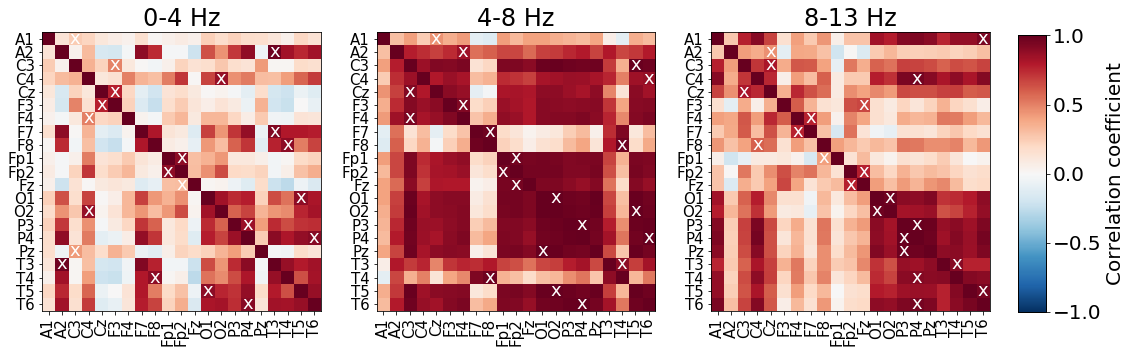

In [30]:
fs = 20
ranges = ["0_4", "4_8", "8_13"]
fig, axes = plt.subplots(1, len(ranges), figsize=(19.5,12))
#plt.subplots_adjust(wspace=.05)
for m, range_ in enumerate(ranges):
    if range_ == "0_4":
        bands_to_pick = [
         '0.0-2.0Hz',
         '1.0-3.0Hz',
         '2.0-4.0Hz',
        ]
        title = "0-4 Hz"
    elif range_ == "4_8":
        bands_to_pick = [
        '4.0-8.0Hz'
    ]
        title = "4-8 Hz"
    elif range_ == "8_13":
        bands_to_pick = [
        '8.0-13.0Hz'
        ]
        title = "8-13 Hz"
    else:
        print("unsupported")
        
    ids = [i for i in range(len(df.columns)) for band in bands_to_pick if band in df.columns[i] ]        
    
    corrs = np.zeros(shape=(len(names), len(names)))
    for j, e1 in enumerate(names):
        for k, e2 in enumerate(names):
            ids_e1 = [i for i in ids if e1.upper() in df.columns[i]]
            ids_e2 = [i for i in ids if e2.upper() in df.columns[i]]        
            assert len(ids_e1) == len(ids_e2)
            corrs[j,k] = np.corrcoef(df.mean()[ids_e1], df.mean()[ids_e2])[0, 1]
    
    ax = axes[m]
    im = ax.imshow(corrs, vmin=-1, vmax=1, cmap="RdBu_r")
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names,rotation=90, fontsize=fs-5);
    ax.set_yticks(range(len(names)))
    ax.set_yticklabels(names, fontsize=fs-5);
    ax.set_title(title, fontsize=fs+4)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.34, 0.02, 0.32])
    cbar = fig.colorbar(im, cax=cbar_ax, )
    cbar.ax.set_ylabel("Correlation coefficient", fontsize=fs);

    for j in range(len(names)):
        max_i = np.argsort(-np.abs(corrs[j]))[1]
        ax.text(max_i, j, "x", va="center", ha="center", color="w", fontsize=fs-2)